## Data Loading and Preprocessing

In [12]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# loading the dataset to a Pandas DataFrame
data = pd.read_csv('full_data.csv')


In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


There are unknown values in the "smoking_status" column. I will be dropping the respective rows.

In [15]:
data.drop(data.index[(data["smoking_status"] == "Unknown")], axis = 0, inplace = True)

In [16]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3481.000000,3481.00000,3481.000000,3481.000000,3481.000000,3481.000000
mean,49.067509,0.12324,0.065211,108.769155,29.808159,0.057742
std,18.894255,0.32876,0.246934,48.133475,6.228310,0.233288
min,10.000000,0.00000,0.000000,55.120000,14.100000,0.000000
25%,34.000000,0.00000,0.000000,77.450000,25.300000,0.000000
50%,50.000000,0.00000,0.000000,92.490000,29.100000,0.000000
75%,64.000000,0.00000,0.000000,116.250000,33.500000,0.000000
max,82.000000,1.00000,1.000000,271.740000,48.900000,1.000000


We check the number of unknown values in each column:

In [17]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   object 
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   object 
 5   work_type          3481 non-null   object 
 6   Residence_type     3481 non-null   object 
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   object 
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 326.3+ KB


Now we have dropped all rows with missing values and are ready to continue to the next part.

### Data Encoding
I will be converting categorical data to numerical representations for computational efficiency.

In [19]:
data['gender'].value_counts()
# Value_counts is used to count the number of instances of each value.

gender
Female    2099
Male      1382
Name: count, dtype: int64

In [20]:
data['gender'] = data['gender'].replace('Female', 1).replace('Male', 0)

In [21]:
data['ever_married'].value_counts()

ever_married
Yes    2656
No      825
Name: count, dtype: int64

In [22]:
data['ever_married']=data['ever_married'].replace('Yes', 1).replace('No', 0)

In [23]:
data['work_type'].value_counts()

work_type
Private          2237
Self-employed     651
Govt_job          524
children           69
Name: count, dtype: int64

In [24]:
data['work_type'] = data['work_type'].replace('Private', 0).replace('Self-employed', 1).replace('children', 2).replace('Govt_job', 3)

In [25]:
data['Residence_type'].value_counts()

Residence_type
Urban    1774
Rural    1707
Name: count, dtype: int64

In [26]:
data['Residence_type'] = data['Residence_type'].replace('Urban', 1).replace('Rural', 0)

In [27]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1838
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [28]:
data["smoking_status"] = data["smoking_status"].replace("never smoked", 0).replace("formerly smoked", 1).replace("smokes", 2)

In [29]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1


In [30]:
data['smoking_status'].value_counts()

smoking_status
0    1838
1     867
2     776
Name: count, dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   int64  
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   int64  
 5   work_type          3481 non-null   int64  
 6   Residence_type     3481 non-null   int64  
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   int64  
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 326.3 KB


## Exploratory Data Analysis

Visualizing the correlation between different features using a heatmap.

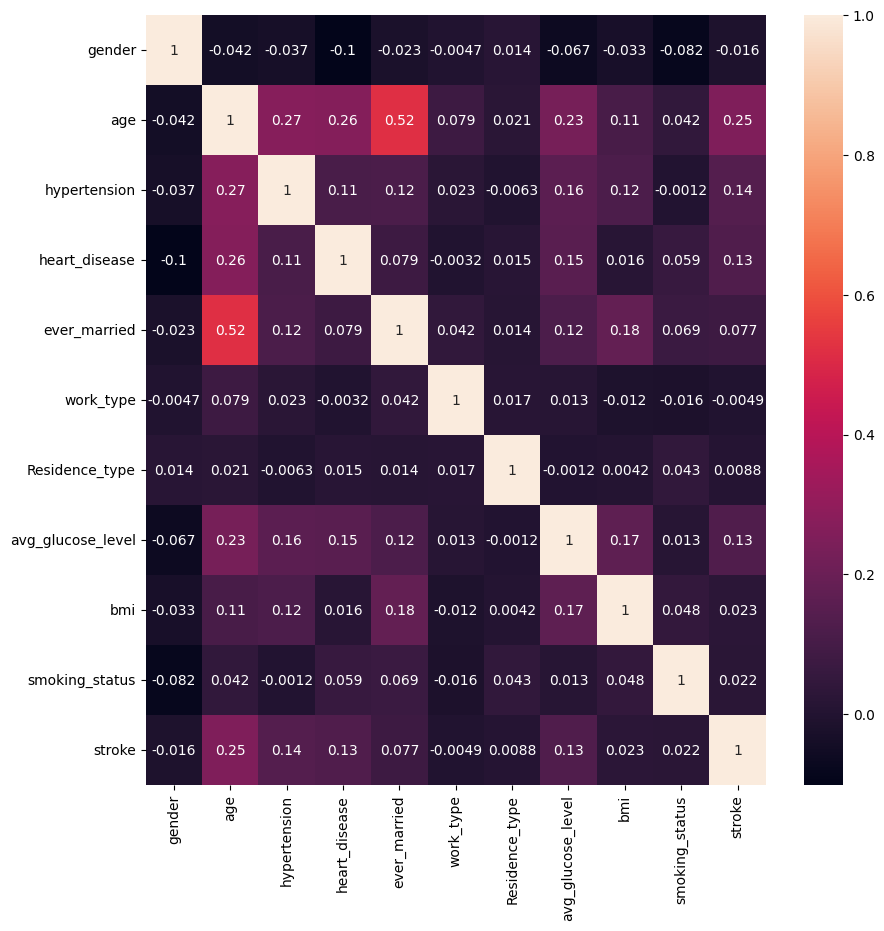

In [32]:
#calculate the pairwise correlation between numerical columns in the df. The result is a correlation matrix where each entry (i, j) represents the correlation betwen the ith and jth numerical columns
corr = data.corr()

plt.figure(figsize=(10, 10))

# Uses Seaborn's heatmap function to visualize the correlation matrix. 
sns.heatmap(corr, annot=True)

plt.show()

### Basic statistics about the dataset. 
I will be generating histrograms for all columns using Seaborn for visualization. (We have converted categorical data into numerical representation earlier.)

In [33]:
# I will split the dataset into a new one which contains only data of patients who had a stroke.
stroke = data[data['stroke'] == 1]

In [34]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1


#### Let's recall the numerical representations for the categorical variables in the initial dataset:

gender: Female = 1 and Male = 0

ever_married: Yes = 1 and No = 0

work_type: Private = 0, Self-employed = 1, children = 2, and Govt_job = 3

Residence_type: Urban = 1, Rural = 0

smoking_status: never smoked = 0, formerly smoked = 1, and smokes = 2


**The blue histogram plots are only for the dataset which contains data of people who had a stroke (stroke = 1):**

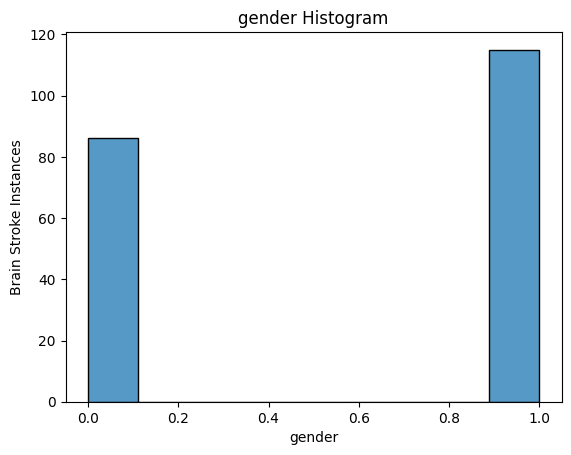

<Figure size 300x200 with 0 Axes>

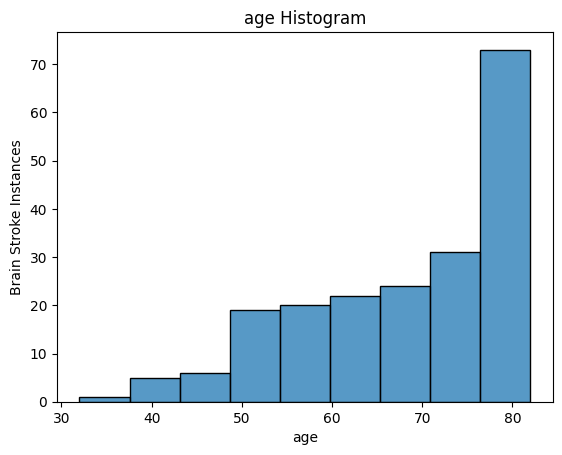

<Figure size 300x200 with 0 Axes>

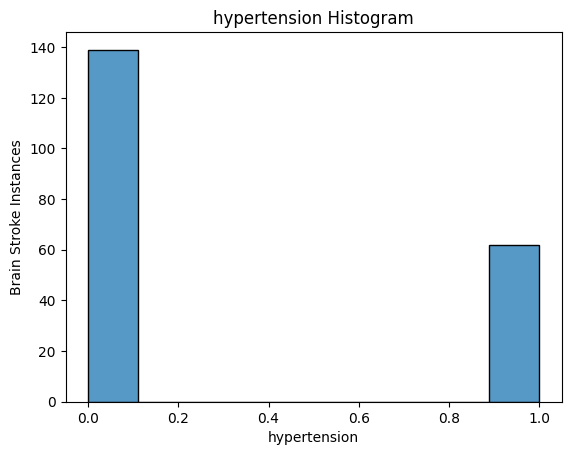

<Figure size 300x200 with 0 Axes>

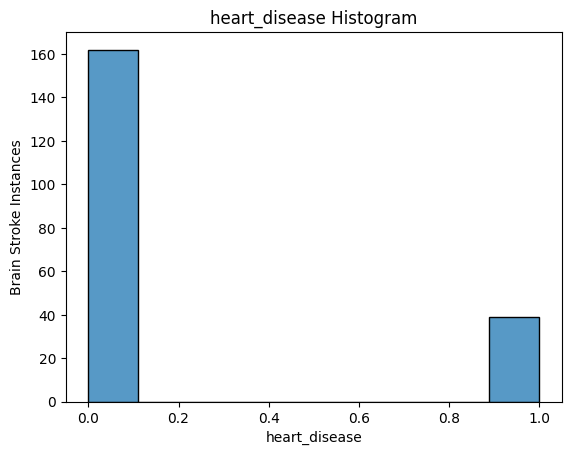

<Figure size 300x200 with 0 Axes>

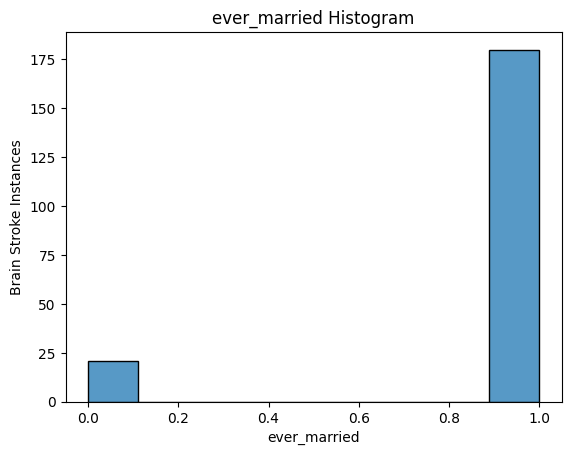

<Figure size 300x200 with 0 Axes>

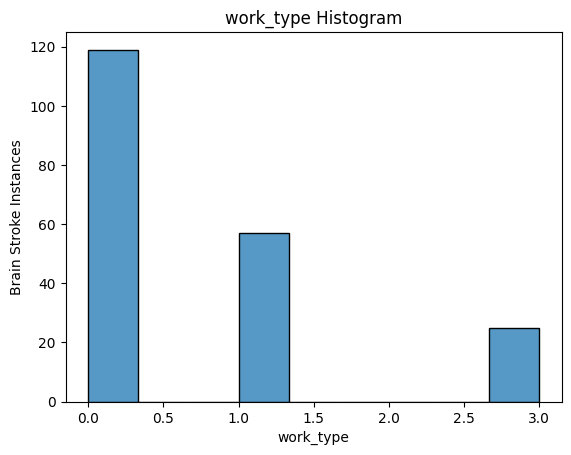

<Figure size 300x200 with 0 Axes>

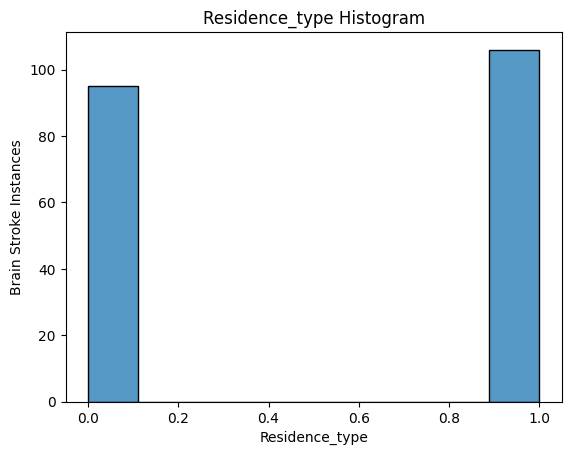

<Figure size 300x200 with 0 Axes>

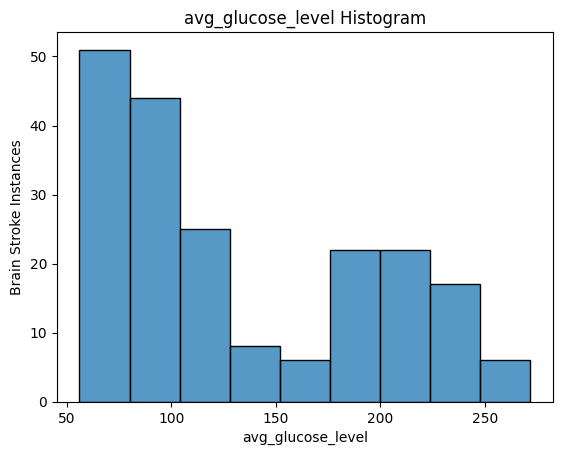

<Figure size 300x200 with 0 Axes>

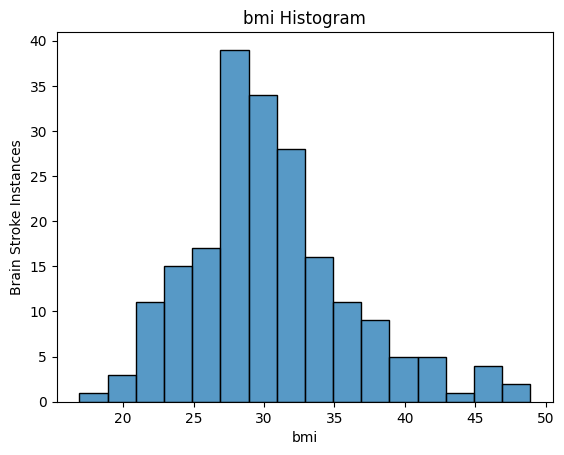

<Figure size 300x200 with 0 Axes>

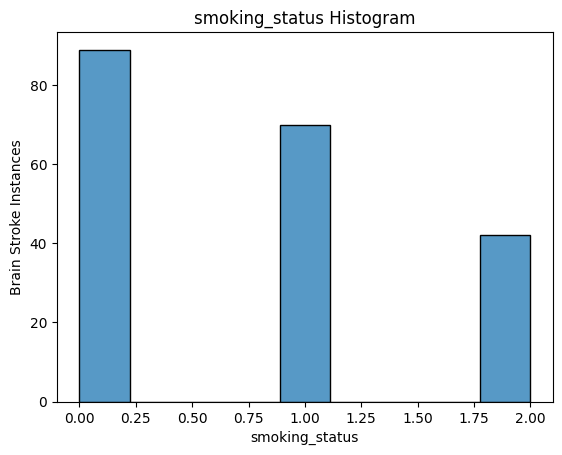

<Figure size 300x200 with 0 Axes>

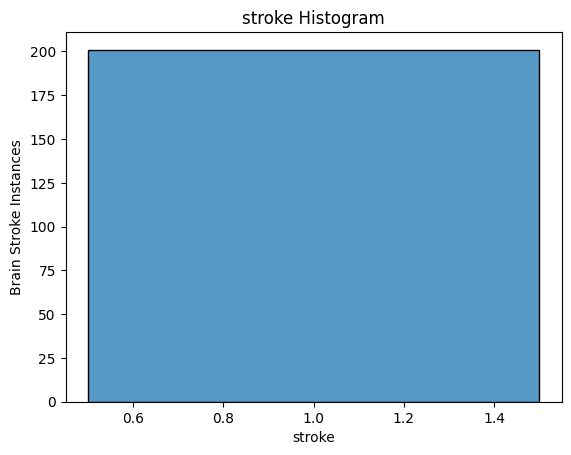

<Figure size 300x200 with 0 Axes>

In [35]:
for column in data.columns:
        sns.histplot(x=column, data=stroke)
        plt.title(f'{column} Histogram')
        plt.ylabel('Brain Stroke Instances')
        plt.figure(figsize=(3,2))
        plt.show()

**The red histogram plots are for all recorded data values (stroke = 1 and stroke = 0).**

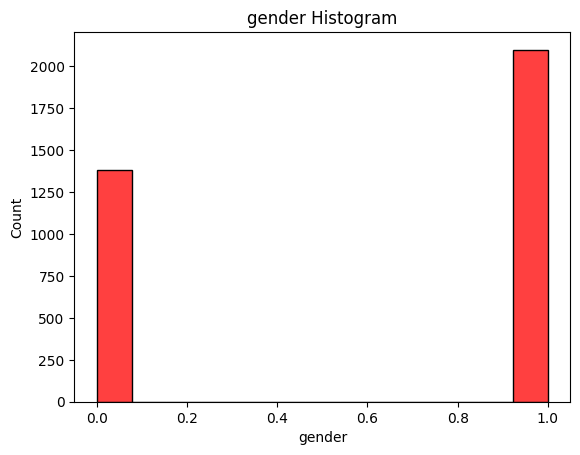

<Figure size 300x200 with 0 Axes>

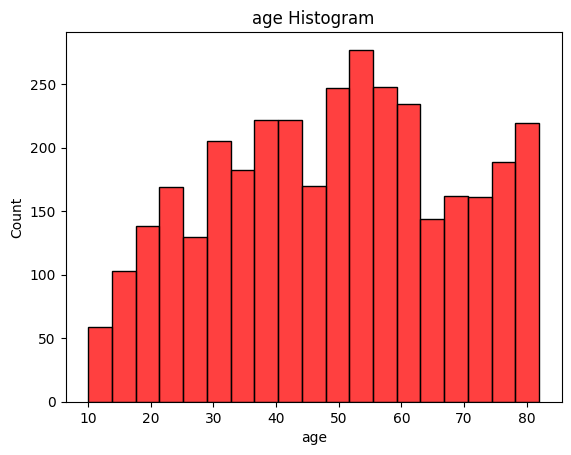

<Figure size 300x200 with 0 Axes>

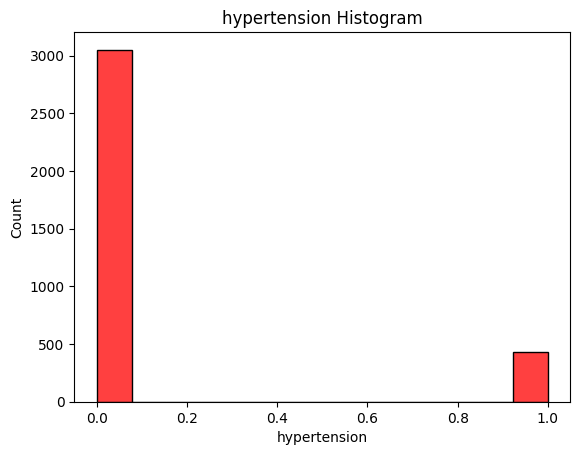

<Figure size 300x200 with 0 Axes>

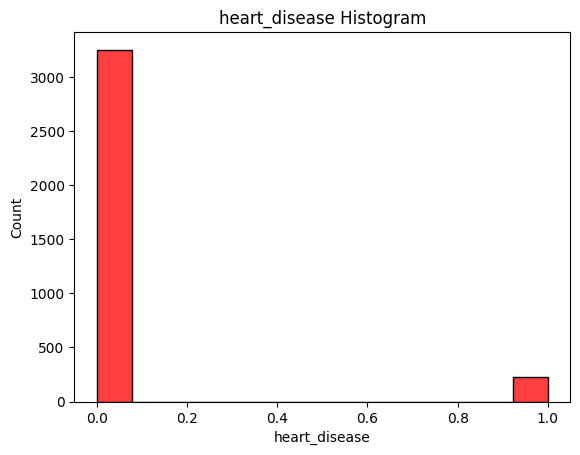

<Figure size 300x200 with 0 Axes>

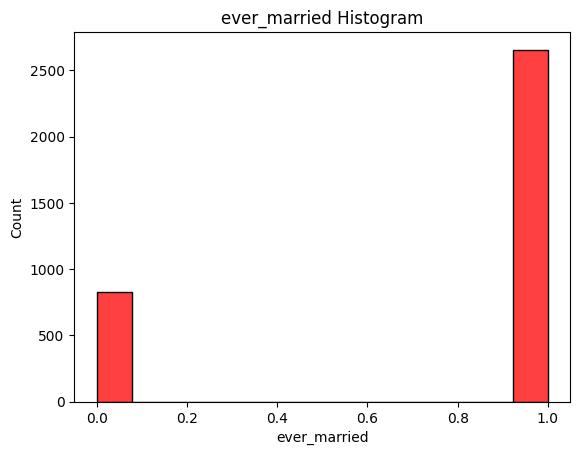

<Figure size 300x200 with 0 Axes>

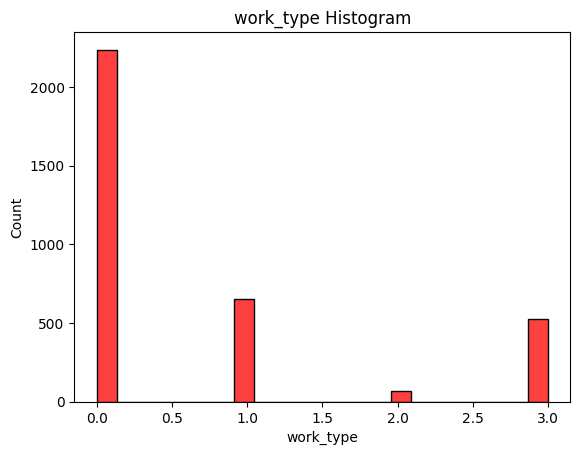

<Figure size 300x200 with 0 Axes>

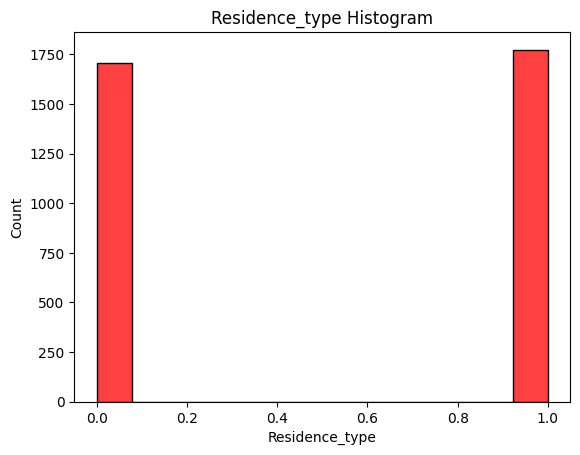

<Figure size 300x200 with 0 Axes>

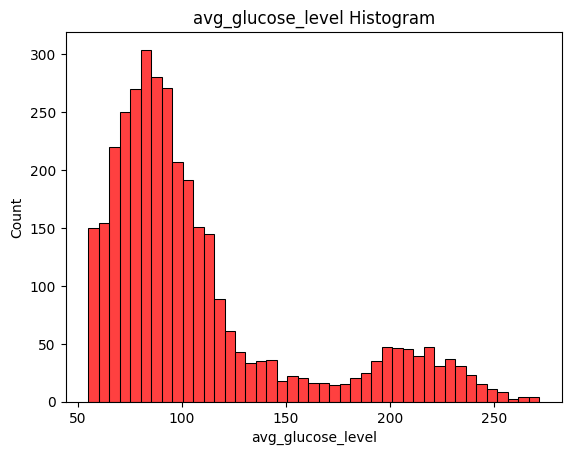

<Figure size 300x200 with 0 Axes>

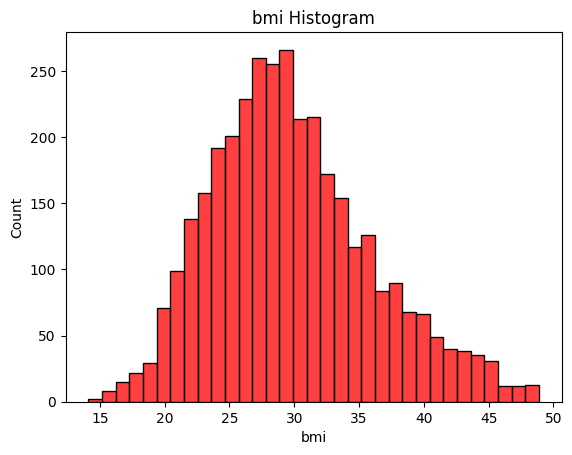

<Figure size 300x200 with 0 Axes>

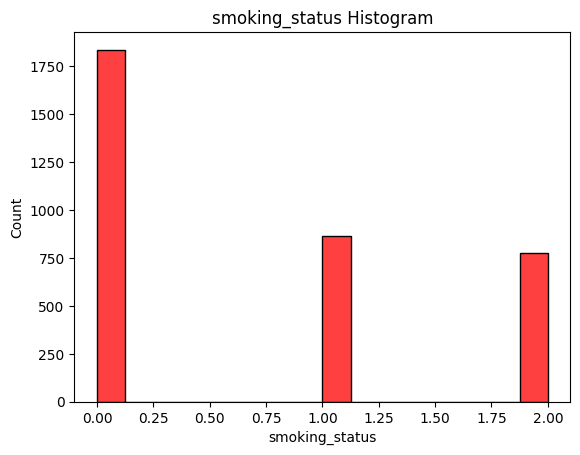

<Figure size 300x200 with 0 Axes>

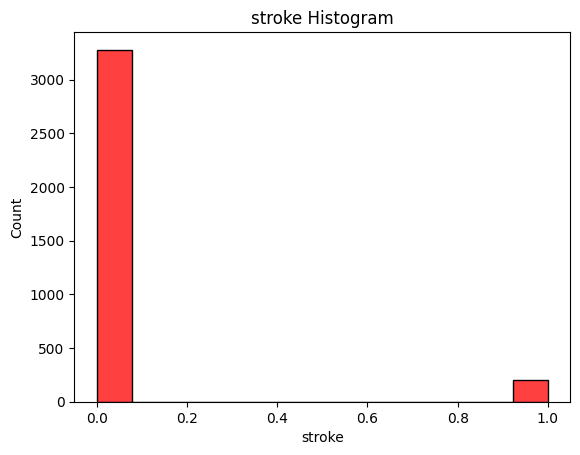

<Figure size 300x200 with 0 Axes>

In [36]:
for column in data.columns:
        sns.histplot(x=column, data=data, color='red')
        plt.title(f'{column} Histogram')
        plt.ylabel('Count')
        plt.figure(figsize=(3,2))
        plt.show()

**In this part, I will be making a few observations from the histogram plots and summary statistics:**

There are more females than males which had a brain stroke.


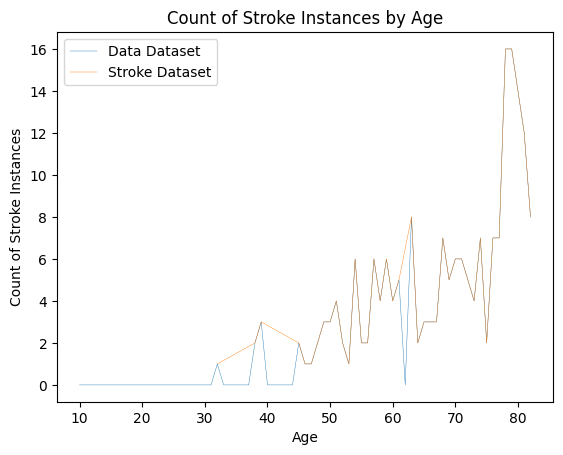

In [37]:
# Get the count of stroke instances by age for both datasets
data_stroke_count = data.groupby('age')['stroke'].sum()
stroke_stroke_count = stroke.groupby('age')['stroke'].sum()

# Plot the lines
plt.plot(data_stroke_count.index, data_stroke_count.values, label='Data Dataset', linewidth =0.3)
plt.plot(stroke_stroke_count.index, stroke_stroke_count.values, label='Stroke Dataset', linewidth = 0.3)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count of Stroke Instances')
plt.title('Count of Stroke Instances by Age')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the above plot, we can say that the number of occurrences of a brain stroke increases with age and is very high for people older than 75 (more than 70 cases recorded) and very low for people under 38 (less than 2 cases recorded from out dataset).

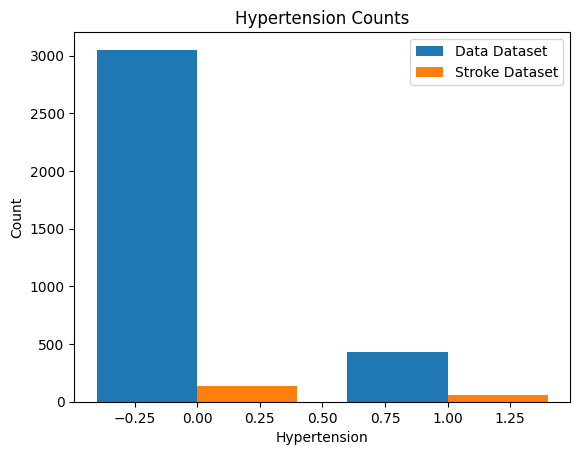

In [38]:
# Get the counts of hypertension values for both datasets
data_hypertension_counts = data['hypertension'].value_counts().sort_index()
stroke_hypertension_counts = stroke['hypertension'].value_counts().sort_index()

# Plot the histogram
plt.bar(data_hypertension_counts.index - 0.2, data_hypertension_counts.values, width=0.4, label='Data Dataset')
plt.bar(stroke_hypertension_counts.index + 0.2, stroke_hypertension_counts.values, width=0.4, label='Stroke Dataset')

# Add labels and title
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Counts')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the above, we can conclude that there is a higher percentage of having a stroke in people who have hypertension, even though the count of no hypertension cases in the total dataset in greater.

In [39]:
stroke['hypertension'].value_counts()

hypertension
0    139
1     62
Name: count, dtype: int64

In [40]:
data['hypertension'].value_counts()


hypertension
0    3052
1     429
Name: count, dtype: int64

In [41]:
stroke['hypertension'].value_counts()

hypertension
0    139
1     62
Name: count, dtype: int64

Percentage of people with *hypertension* that get a stroke is *triple* that of those with no hypertension. So I can say that hypertension is a good predictor.